In [1]:
def rotate(A):
    x = A[len(A) - 1]
    for i in range(len(A) - 1, 0, -1):
        A[i] = A[i - 1];
        A[0] = x;
    return A


def checkCyclic(A, B):
    """ Checks if two orbits are members of the same group orbit
    
    A: 
    
    """
    return ', '.join(map(str, A)) in ', '.join(map(str, B)) 

def primeOrbits(initial_conditions, check_neg, check_rev): 
    #initial conditions should be you entire list of possible shadow state configurations
    #check_neg is a value that takes either 1 or 0 where if it is 1, it will check for phi to negative phi symmetry
    initial_conditions[initial_conditions == 1] = 3
    initial_conditions[initial_conditions == 0] = 2
    initial_conditions[initial_conditions == -1] = 1
    # here i am just changing my shadow state values to a different symbolic alphabet that will work better
    double_cycles = np.append(initial_conditions,initial_conditions,axis=1)
    # double_cycles is each shadow state repeated so that it is twice its length. This is used show checking for cyclic
    # permutations as every permunation exists in the orbit as if it goes through it twice. Ex: all cyclic permutation of 123 
    # exist somwhere in 123123
    i = 0
    while i < np.shape(initial_conditions)[0]: #looping through each row of the initial conditions
        j = np.shape(initial_conditions)[0] - 1
        while j > i: #looping rows of double_cycles, starting at the bottomw and ending before the row of the current 
                     #orbit we are checking
            if checkCyclic(initial_conditions[i],double_cycles[j]) == True:
                initial_conditions = np.delete(initial_conditions, j, 0) 
                double_cycles = np.delete(double_cycles, j, 0)    # if a orbit string exists in the double_cycle of of another
            j = j - 1                                             # orbit, delete one of the orbits
        i = i + 1
    if check_neg == 1:
        initial_conditions[initial_conditions == 1] = -1 #if we want to check if cycles are just negatives of another cycle
        initial_conditions[initial_conditions == 2] = 0
        initial_conditions[initial_conditions == 3] = 1
        initial_conditions = initial_conditions*(-1)     # have to first convert to shadow states in order to apply negative
        initial_conditions[initial_conditions == 1] = 3  # sign to states, then convert back the the 1 2 3 alphabet
        initial_conditions[initial_conditions == 0] = 2
        initial_conditions[initial_conditions == -1] = 1
        i = 0
        while i < np.shape(initial_conditions)[0]:
            j = np.shape(initial_conditions)[0] - 1
            while j > i:
                if checkCyclic(initial_conditions[i],double_cycles[j]) == True:
                    initial_conditions = np.delete(initial_conditions, j, 0)    # does the same process as before but for 
                    double_cycles = np.delete(double_cycles, j, 0)              # the comparing the negatives of the orbits
                j = j - 1                                                       # to the double cycles
            i = i + 1
        initial_conditions[initial_conditions == 1] = -1
        initial_conditions[initial_conditions == 2] = 0
        initial_conditions[initial_conditions == 3] = 1
        initial_conditions = initial_conditions*(-1)
        initial_conditions[initial_conditions == 1] = 3
        initial_conditions[initial_conditions == 0] = 2
        initial_conditions[initial_conditions == -1] = 1
    if check_rev == 1:
        initial_conditions = initial_conditions[...,::-1]
        i = 0
        while i < np.shape(initial_conditions)[0]:
            j = np.shape(initial_conditions)[0] - 1
            while j > i:
                if checkCyclic(initial_conditions[i],double_cycles[j]) == True:
                    initial_conditions = np.delete(initial_conditions, j, 0)
                    double_cycles = np.delete(double_cycles, j, 0)
                j = j - 1
            i = i + 1
    copy_of_reversed_initial = initial_conditions.copy()
    i = 0
    del_array = np.zeros(np.shape(initial_conditions)[0])
    while i < np.shape(initial_conditions)[0]:
        j = 1
        while j <= np.shape(initial_conditions)[1] - 1:
            rotate(copy_of_reversed_initial[i])
            if checkCyclic(copy_of_reversed_initial[i],initial_conditions[i]) == True:
                del_array[i] = 1
            j = j + 1
        i = i + 1
        
    initial_conditions = np.delete(initial_conditions, np.where(del_array == 1), 0)
    
    initial_conditions[initial_conditions == 1] = -1
    initial_conditions[initial_conditions == 2] = 0
    initial_conditions[initial_conditions == 3] = 1

    return initial_conditions

In [27]:
# def mattscheckCyclic(A, B):
#     """ Checks if two orbits are members of the same group orbit
#
#     A:
#
#     """
#     return ', '.join(map(str, A)) in ', '.join(map(str, B))

def mattsprimeOrbits(initial_conditions, check_neg, check_rev):
    #initial conditions should be you entire list of possible shadow state configurations
    #check_neg is a value that takes either 1 or 0 where if it is 1, it will check for phi to negative phi symmetry
    if -1 in np.unique(initial_conditions):
        initial_conditions += 2
    # here i am just changing my shadow state values to a different symbolic alphabet that will work better
    double_cycles = np.append(initial_conditions,initial_conditions,axis=1)
    # double_cycles is each shadow state repeated so that it is twice its length. This is used show checking for cyclic
    # permutations as every permunation exists in the orbit as if it goes through it twice. Ex: all cyclic permutation of 123
    # exist somwhere in 123123
    i = 0
    while i < np.shape(initial_conditions)[0]: #looping through each row of the initial conditions
        j = np.shape(initial_conditions)[0] - 1
        while j > i: #looping rows of double_cycles, starting at the bottomw and ending before the row of the current 
                     #orbit we are checking
            if checkCyclic(initial_conditions[i],double_cycles[j]) == True:
                initial_conditions = np.delete(initial_conditions, j, 0) 
                double_cycles = np.delete(double_cycles, j, 0)    # if a orbit string exists in the double_cycle of of another
            j = j - 1                                             # orbit, delete one of the orbits
        i = i + 1
    if check_neg == 1:
        initial_conditions = -1 * (initial_conditions % -4)
        i = 0
        while i < np.shape(initial_conditions)[0]:
            j = np.shape(initial_conditions)[0] - 1
            while j > i:
                if checkCyclic(initial_conditions[i],double_cycles[j]) == True:
                    initial_conditions = np.delete(initial_conditions, j, 0)    # does the same process as before but for 
                    double_cycles = np.delete(double_cycles, j, 0)              # the comparing the negatives of the orbits
                j = j - 1                                                       # to the double cycles
            i = i + 1
        initial_conditions = -1 * (initial_conditions % -4)
    if check_rev == 1:
        initial_conditions = initial_conditions[...,::-1]
        i = 0
        while i < np.shape(initial_conditions)[0]:
            j = np.shape(initial_conditions)[0] - 1
            while j > i:
                if checkCyclic(initial_conditions[i],double_cycles[j]) == True:
                    initial_conditions = np.delete(initial_conditions, j, 0)
                    double_cycles = np.delete(double_cycles, j, 0)
                j = j - 1
            i = i + 1
    copy_of_reversed_initial = initial_conditions.copy()
    i = 0
    del_array = np.zeros(np.shape(initial_conditions)[0])
    while i < np.shape(initial_conditions)[0]:
        j = 1
        while j <= np.shape(initial_conditions)[1] - 1:
            copy_of_reversed_initial[i] = np.roll(copy_of_reversed_initial[i], 1)
            if checkCyclic(copy_of_reversed_initial[i], initial_conditions[i]) == True:
                del_array[i] = 1
            j = j + 1
        i = i + 1
        
    initial_conditions = np.delete(initial_conditions, np.where(del_array == 1), 0)
    initial_conditions -= 2
    return initial_conditions

In [4]:
import numpy as np

In [5]:
import itertools

In [8]:
states = [-1, 0, 1]

In [9]:
n = 9

In [10]:

# initial_conditions2 = initial_conditions.copy()

In [11]:
import time


In [15]:
initial_conditions = np.array(list(itertools.product(*tuple(states for i in range(9)))))
initshape = len(initial_conditions)
t0 = time.time_ns()/10**9
primes = primeOrbits(initial_conditions, True, True)
t1 = time.time_ns()/10**9
print(initshape, primes.shape)
print(t1-t0)

19683 (460, 9)
177.9800488948822


In [18]:
states = primes+2

In [19]:
symbols = np.sort(np.array(states.astype(str), dtype=object).sum(axis=1))


In [22]:
from cyclehunter import *

In [25]:
x = PhiK(9, 3, 5)

In [26]:
p = x.generate_states(prime=True)

In [29]:
p.states.shape

(599, 9)

In [30]:
primes.shape

(460, 9)

In [31]:
import matplotlib.pyplot as plt

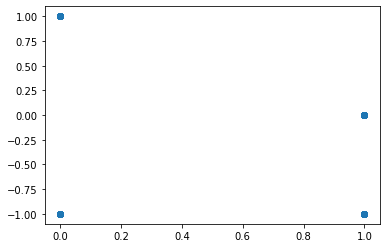

In [32]:
plt.scatter(primes[:, 0], primes[:, 1])

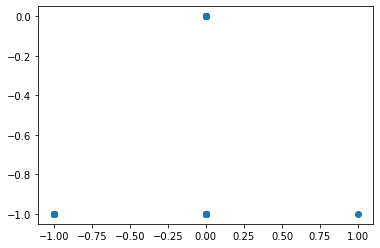

In [34]:
plt.scatter(p.states[:, 0], p.states[:, 1])

In [8]:
mattsprimeOrbits(initial_conditions2, True, True)

array([[ 0, -1, -1],
       [ 1, -1, -1],
       [ 0,  0, -1],
       [ 1,  0, -1]])